Importing libraries

In [156]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Importing Files

In [157]:
df1=pd.read_csv("/Users/deepikachadha/Desktop/HR_1.csv")
df2=pd.read_csv("/Users/deepikachadha/Desktop/HR_2.csv")

Merging Files

In [158]:
merged_df=pd.merge(df1, df2, left_on='EmployeeNumber', right_on='Employee ID', how='inner')


To check the shape of the dataframe

In [86]:
merged_df.shape

(50000, 36)

To Know the names of the columns

In [87]:
merged_df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'Employee ID', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'Over18', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

To print the top 5 rows of the dataframe

In [88]:
merged_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,31,No,Non-Travel,158,Software,7,3,Medical,1,1,...,1,80,2,15,1,2,12,4,10,11
1,38,No,Travel_Rarely,985,Human Resources,33,5,Life Sciences,1,2,...,3,80,4,5,4,3,1,1,1,1
2,59,Yes,Non-Travel,1273,Sales,5,2,Technical Degree,1,3,...,2,80,2,9,5,1,6,6,4,3
3,52,Yes,Travel_Rarely,480,Support,2,5,Marketing,1,4,...,2,80,2,22,4,4,10,9,5,6
4,32,No,Non-Travel,543,Human Resources,7,5,Human Resources,1,5,...,4,80,2,30,3,4,29,27,9,7


KPI's

In [89]:
Employee_count= merged_df["EmployeeNumber"].nunique()
print("Total no. of Employees =", Employee_count)
attrition_counts = merged_df[merged_df['Attrition']=="Yes"].shape[0]
print("Attrition count=", attrition_counts)
Attrition_rate= (attrition_counts/Employee_count)*100
print(f"Attrition rate=, {Attrition_rate:,.2f}%")
Active_Employee= Employee_count - attrition_counts
print("Active Employee count=", Active_Employee)
Average_Age=merged_df["Age"].mean()
print(f"Average Age of Employees=, {Average_Age:,.0f}")


Total no. of Employees = 50000
Attrition count= 25105
Attrition rate=, 50.21%
Active Employee count= 24895
Average Age of Employees=, 39


Gender Wise Count

In [90]:
merged_df["Gender"].value_counts()

Gender
Male      25059
Female    24941
Name: count, dtype: int64

Gender Wise Average Hourly Rate

In [91]:
merged_df.groupby("Gender")["HourlyRate"].mean().round(3)


Gender
Female    115.253
Male      115.612
Name: HourlyRate, dtype: float64

Average Working years for each Department

In [93]:
merged_df.groupby("Department")["TotalWorkingYears"].mean().round(2 )

Department
Hardware                  20.48
Human Resources           20.45
Research & Development    20.30
Sales                     20.62
Software                  20.65
Support                   20.48
Name: TotalWorkingYears, dtype: float64

Department wise Average Attrition Rate

In [60]:
# Convert Attrition to numerical values
merged_df["Attrition_Flag"]=merged_df["Attrition"].apply(lambda x: 1 if x=="Yes" else 0)

# Group by Department and calculate the attrition rate
Department_attrition_rate=merged_df.groupby("Department")["Attrition_Flag"].mean().round(2)

# Sort the attrition rate in descending order
Department_attrition_rate= Department_attrition_rate.sort_values(ascending=False)

# Display results
print(Department_attrition_rate)

# Overall attrition rate
overall_attrition_rate= merged_df["Attrition_Flag"].mean().round(2)
print(f"Overall attrition rate=, {overall_attrition_rate:,.2f}")

Department
Research & Development    0.51
Software                  0.51
Human Resources           0.50
Sales                     0.50
Support                   0.50
Hardware                  0.49
Name: Attrition_Flag, dtype: float64
Overall attrition rate=, 0.50


Job Role wise average work life balance

In [62]:
merged_df.groupby("JobRole")["WorkLifeBalance"].mean().round(2)

JobRole
Developer                    2.51
Healthcare Representative    2.51
Human Resources              2.51
Laboratory Technician        2.49
Manager                      2.50
Manufacturing Director       2.50
Research Director            2.49
Research Scientist           2.51
Sales Executive              2.47
Sales Representative         2.50
Name: WorkLifeBalance, dtype: float64

Charts

Department and Gender wise average hourly rate

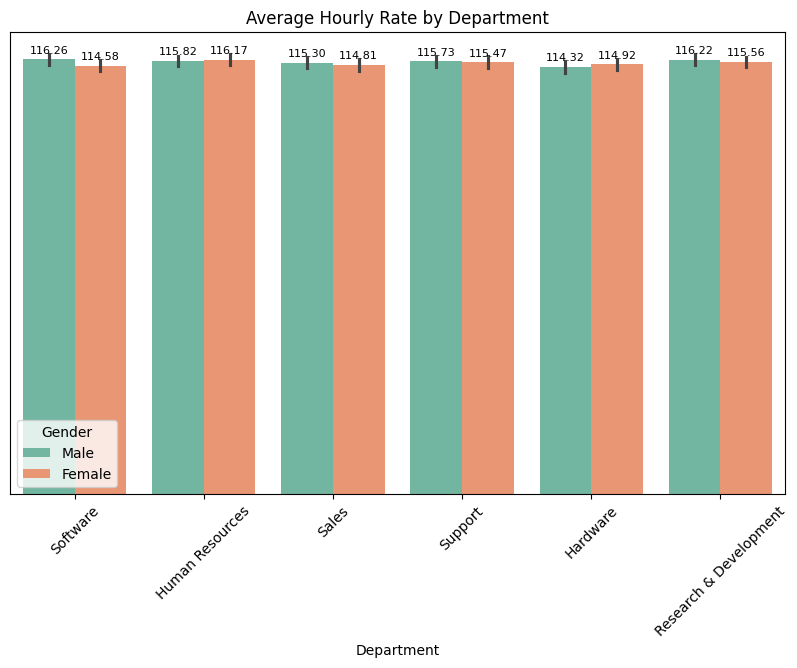

In [125]:
plt.figure(figsize=(10, 6))
ax= sns.barplot(x="Department", y="HourlyRate", data=merged_df, hue="Gender", palette="Set2")
ax.set_title("Average Hourly Rate by Department")
ax.set_xlabel("Department")
ax.get_yaxis().set_visible(False)
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', fontsize=8, padding=3)
plt.xticks(rotation=45)
plt.legend
plt.show()



Age Group wise Employee Count

/var/folders/qw/bsy30hf50751czt8jkb7k_2w0000gn/T/ipykernel_7119/2619138698.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_group_counts.index, y=age_group_counts.values, palette="viridis")


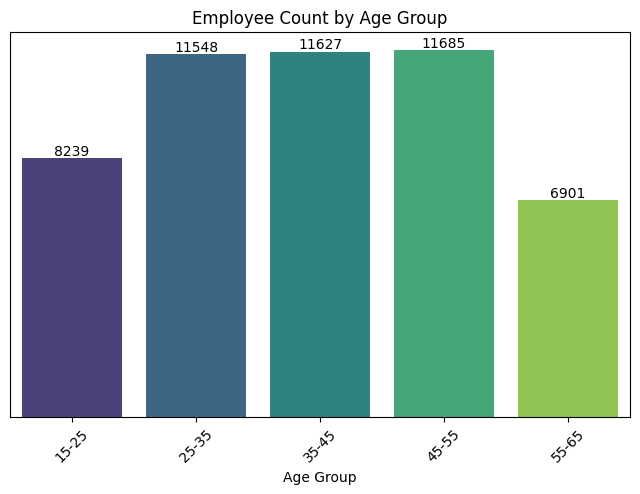

In [165]:
bins=[15, 25, 35, 45, 55, 65]
labels=["15-25", "25-35", "35-45", "45-55", "55-65"]
merged_df["Age_group"]=pd.cut(merged_df["Age"], bins=bins, labels=labels, right=False)
# Count the number of employees in each age group
age_group_counts=merged_df["Age_group"].value_counts().sort_index()
# Plot the age group counts
plt.figure(figsize=(8, 5))
sns.barplot(x=age_group_counts.index, y=age_group_counts.values, palette="viridis")
plt.title("Employee Count by Age Group")
plt.xlabel("Age Group")
plt.ylabel("") 

# Add values on top of the bars
for i, count in enumerate(age_group_counts):
    plt.text(i, count + 0.5, str(count), ha='center', va='bottom', fontsize=10)
plt.xticks(rotation=45)
plt.yticks([])
plt.show()

Employee Count by Year Since Last Promotion

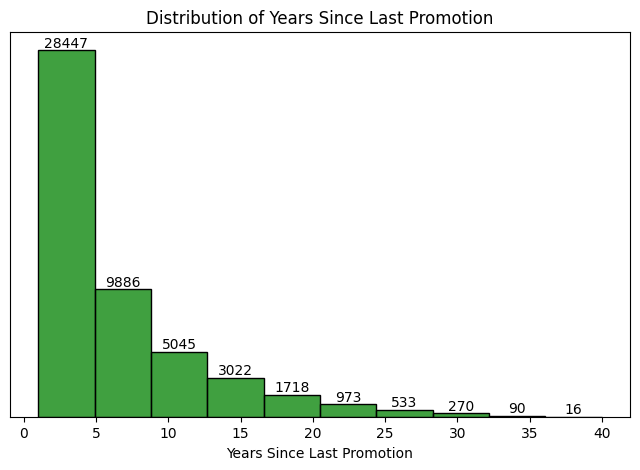

In [166]:
sns.set
plt.figure(figsize=(8, 5))
ax= sns.histplot(x="YearsSinceLastPromotion",bins=10, kde= False, color="green", data=merged_df)
# Add values on top of the bars
for p in ax.patches:
    if p.get_height() > 0:
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', fontsize=10)
plt.title("Distribution of Years Since Last Promotion")
plt.xlabel("Years Since Last Promotion")
plt.ylabel("")
plt.yticks([])
plt.show()